In [8]:
import os, sys, psutil
from debugpy import breakpoint
import cv2
import numpy as np
from skimage import io
from concurrent.futures.process import ProcessPoolExecutor
from utilities.utilities_mask import rotate_image, pad_image, scaled, equalized
from utilities.utilities_process import test_dir, SCALING_FACTOR, get_cpus
import tifffile as tiff
from PIL import Image

Image.MAX_IMAGE_PIXELS = None
from lib.pipeline_utilities import read_image, get_max_image_size, convert_size
from model.slide import SlideCziTif
from model.slide import Slide
from model.slide import Section
from copy import copy
from pathlib import Path
import operator
import gc
from timeit import default_timer as timer
def apply_mask(img, mask, infile):
    try:
        cleaned = cv2.bitwise_and(img, img, mask=mask)
    except:
        print(
            f"Error in masking {infile} with mask shape {mask.shape} img shape {img.shape}"
        )
        print("Are the shapes exactly the same?")
        print("Unexpected error:", sys.exc_info()[0])
        raise
    return cleaned

In [20]:
file_key = ['/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK73/preps/CH1/thumbnail/194.tif', '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK73/preps/CH1/thumbnail_cleaned/194.tif', '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK73/preps/masks/thumbnail_masked/194.tif', 3, 'none', 1212, 1956, 1]
infile, outpath, maskfile, rotation, flip, max_width, max_height, channel = file_key

In [21]:
img = read_image(infile)
print(f"MEM SIZE OF img {infile}: {convert_size(sys.getsizeof(img))}")
mask = read_image(maskfile)
print(f"MEM SIZE OF mask {maskfile}: {convert_size(sys.getsizeof(mask))}")
cleaned = apply_mask(img, mask, infile)
print(f"MEM SIZE OF cleaned: {convert_size(sys.getsizeof(cleaned))}")
print(
    f"TOTAL MEMORY SIZE FOR AGGREGATE (img, mask, cleaned): {convert_size(sys.getsizeof(img)+sys.getsizeof(mask)+sys.getsizeof(cleaned))}"
)
if channel == 1:
    cleaned = scaled(cleaned, mask, epsilon=0.01)
    cleaned = equalized(cleaned)
# cropped = crop_image(cleaned, mask)
del img
del mask
print("START ROTATION")


MEM SIZE OF img /net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK73/preps/CH1/thumbnail/194.tif: 3.46 MB
MEM SIZE OF mask /net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK73/preps/masks/thumbnail_masked/194.tif: 1.73 MB
MEM SIZE OF cleaned: 3.46 MB
TOTAL MEMORY SIZE FOR AGGREGATE (img, mask, cleaned): 8.64 MB
START ROTATION


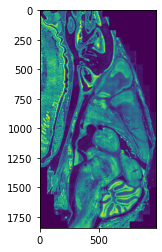

In [22]:
import matplotlib.pyplot as plt
plt.imshow(cleaned)

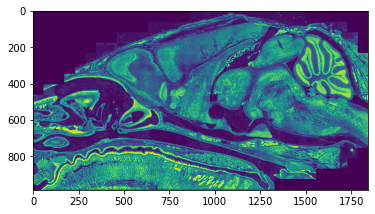

In [23]:
img = read_image(infile)
plt.imshow(img)

In [ ]:
if rotation > 0:
    cleaned = rotate_image(cleaned, infile, rotation)
if flip == "flip":
    cleaned = np.flip(cleaned)
if flip == "flop":
    cleaned = np.flip(cleaned, axis=1)
print("START PAD IMAGE")
cropped = pad_image(cleaned, infile, max_width, max_height, 0)
start_time = timer()
print("START FILESAVE ", outpath)
tiff.imsave(outpath, cropped)
end_time = timer()
print(f"SAVE TIME: {round((end_time - start_time), 1)} s")
del cropped

In [41]:
czi = CZIManager(file)
data = czi.get_scene(scale=0.001, scene_index=1, channel=1)
imsave(out, data)


In [34]:
file = '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK73/czi/DK73_slide046_2022_03_01_axion2.czi'

In [37]:
extract_tiff_from_czi(file,out,scale = 0.03125,scenei=2)


In [22]:
czi = CZIManager(file)
data = czi.get_scene(scale=0.01, scene_index=2, channel=2)

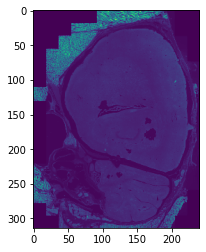

In [36]:
plt.imshow(data)

In [21]:
def align_image(INPUT,file):
    infile = os.path.join(INPUT, file)
    T = transforms[file]
    image = tiff.imread(infile)
    matrix = T[:2,:2]
    offset = T[:2,2]
    offset = np.flip(offset)
    image1 = affine_transform(image,matrix.T,offset)
    return image,image1,T

In [30]:
def show_aligned_image(id):
    file=f'{id}.tif'
    INPUT = fileLocationManager.get_thumbnail_cleaned(channel)
    image,image1,T = align_image(INPUT,file)
    INPUT = '/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/DK73/preps/CH1/thumbnail_aligned_extra_pad'
    imagep,imagep1,T = align_image(INPUT,file)
    plt.figure(figsize = [10,10])
    plt.subplot(2,2,1)
    plt.imshow(image)
    plt.subplot(2,2,2)
    plt.imshow(image1)
    plt.subplot(2,2,3)
    plt.imshow(imagep)
    plt.subplot(2,2,4)
    plt.imshow(imagep1)



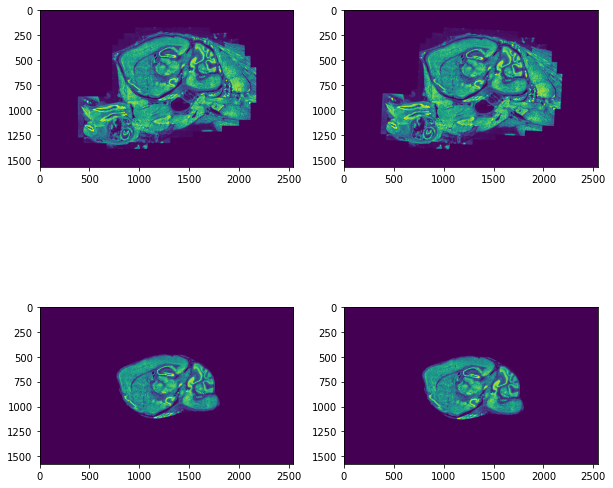

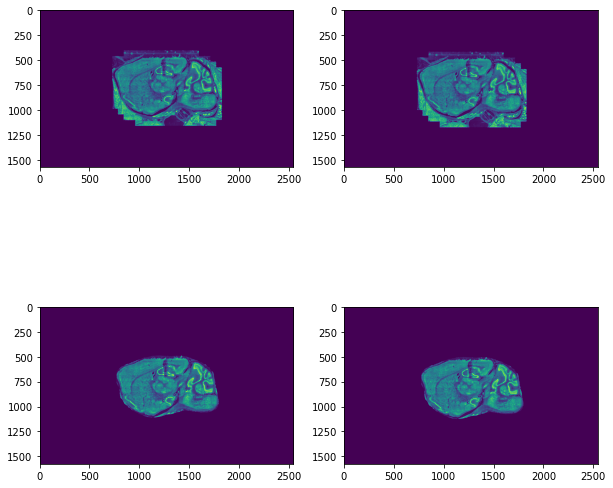

In [31]:
show_aligned_image(115)
show_aligned_image(114)

In [7]:
pip = Pipeline(animal='DK73')
sections = pip.sqlController.get_sections(pip.animal,pip.channel)
rotations_per_section = [pip.get_section_rotation(i) for i in sections]
len(rotations_per_section)

Check programs took 0.0 seconds


216